In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns

In [2]:
from datetime import datetime, timedelta

In [63]:
import statsmodels.api as sm

In [3]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv', sep=',')

In [4]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Удаляем колонки согласно ТЗ:

In [5]:
df.drop(columns=['weather_description','weather_main','clouds_all','snow_1h','rain_1h'], axis=1, inplace=True)

In [6]:
df.head()

,holiday,temp,date_time,traffic_volume
0,None,288.28,2012-10-02 09:00:00,5545
1,None,289.36,2012-10-02 10:00:00,4516
2,None,289.58,2012-10-02 11:00:00,4767
3,None,290.13,2012-10-02 12:00:00,5026
4,None,291.14,2012-10-02 13:00:00,4918


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48204 non-null  float64
 2   date_time       48204 non-null  object 
 3   traffic_volume  48204 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


In [8]:
df.shape

(48204, 4)

Убираем дубли, оставляя последнюю запись:

In [9]:
df.drop_duplicates(subset=['date_time'], keep='last', inplace=True)

In [10]:
df.shape

(40575, 4)

In [11]:
unique, counts = np.unique(df['date_time'], return_counts=True)
for key,value in dict(zip(unique, counts)).items():
    if value > 1:
        print(f'Количество записей даты: {key} - {value}')

Преобразуем колонку "date_time" в datetime, т.к. нужны вычисления по этим данным:

In [12]:
df['date_time'] =  pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

In [13]:
df.isnull().sum()

holiday           0
temp              0
date_time         0
traffic_volume    0
dtype: int64

Пропусков в данных нет. Сбрасываем индекс, т.к. мы удаляли дубликаты и индекс поплыл:

In [14]:
df = df.reset_index(drop=True)

Проверим есть ли неравномерность в срезах каждый час:

In [15]:
for index, row in df.iterrows():
    if index > 0:
        if (df.loc[index, ('date_time')] - df.loc[index - 1, ('date_time')]).seconds > 3600:
            print(f"{df.loc[index - 1, ('date_time')]} - {df.loc[index, ('date_time')]}")

2012-10-03 06:00:00 - 2012-10-03 08:00:00
2012-10-03 09:00:00 - 2012-10-03 12:00:00
2012-10-03 16:00:00 - 2012-10-03 18:00:00
2012-10-05 01:00:00 - 2012-10-05 03:00:00
2012-10-05 03:00:00 - 2012-10-05 05:00:00
2012-10-06 02:00:00 - 2012-10-06 04:00:00
2012-10-07 00:00:00 - 2012-10-07 03:00:00
2012-10-09 02:00:00 - 2012-10-09 04:00:00
2012-10-10 03:00:00 - 2012-10-10 06:00:00
2012-10-10 16:00:00 - 2012-10-10 18:00:00
2012-10-10 23:00:00 - 2012-10-11 01:00:00
2012-10-11 01:00:00 - 2012-10-11 03:00:00
2012-10-11 10:00:00 - 2012-10-11 14:00:00
2012-10-12 18:00:00 - 2012-10-12 23:00:00
2012-10-21 00:00:00 - 2012-10-21 08:00:00
2012-10-21 08:00:00 - 2012-10-21 17:00:00
2012-10-21 18:00:00 - 2012-10-21 22:00:00
2012-10-22 06:00:00 - 2012-10-22 10:00:00
2012-10-25 08:00:00 - 2012-10-25 10:00:00
2012-11-04 03:00:00 - 2012-11-04 05:00:00
2012-11-05 14:00:00 - 2012-11-05 16:00:00
2012-11-05 18:00:00 - 2012-11-05 20:00:00
2012-11-06 10:00:00 - 2012-11-06 12:00:00
2012-11-11 21:00:00 - 2012-11-11 2

2013-04-01 09:00:00 - 2013-04-01 12:00:00
2013-04-01 13:00:00 - 2013-04-01 16:00:00
2013-04-01 22:00:00 - 2013-04-02 00:00:00
2013-04-04 21:00:00 - 2013-04-04 23:00:00
2013-04-05 09:00:00 - 2013-04-05 11:00:00
2013-04-06 05:00:00 - 2013-04-06 07:00:00
2013-04-17 08:00:00 - 2013-04-17 10:00:00
2013-04-19 07:00:00 - 2013-04-19 09:00:00
2013-04-20 22:00:00 - 2013-04-21 00:00:00
2013-04-24 06:00:00 - 2013-04-24 08:00:00
2013-04-26 07:00:00 - 2013-04-26 09:00:00
2013-05-01 00:00:00 - 2013-05-01 02:00:00
2013-05-17 14:00:00 - 2013-05-17 16:00:00
2013-05-20 15:00:00 - 2013-05-20 17:00:00
2013-05-28 06:00:00 - 2013-05-28 08:00:00
2013-05-29 02:00:00 - 2013-05-29 04:00:00
2013-06-11 05:00:00 - 2013-06-11 07:00:00
2013-06-13 04:00:00 - 2013-06-13 06:00:00
2013-06-13 19:00:00 - 2013-06-13 21:00:00
2013-06-19 03:00:00 - 2013-06-19 05:00:00
2013-06-19 06:00:00 - 2013-06-19 10:00:00
2013-06-19 11:00:00 - 2013-06-19 15:00:00
2013-06-19 16:00:00 - 2013-06-19 21:00:00
2013-06-19 21:00:00 - 2013-06-19 2

2013-11-14 07:00:00 - 2013-11-14 09:00:00
2013-11-16 05:00:00 - 2013-11-16 07:00:00
2013-11-16 07:00:00 - 2013-11-16 09:00:00
2013-11-16 09:00:00 - 2013-11-16 11:00:00
2013-11-16 11:00:00 - 2013-11-16 13:00:00
2013-11-17 10:00:00 - 2013-11-17 12:00:00
2013-11-17 19:00:00 - 2013-11-17 21:00:00
2013-11-18 05:00:00 - 2013-11-18 07:00:00
2013-11-18 13:00:00 - 2013-11-18 15:00:00
2013-11-18 15:00:00 - 2013-11-18 17:00:00
2013-11-25 06:00:00 - 2013-11-25 08:00:00
2013-11-25 08:00:00 - 2013-11-25 10:00:00
2013-11-25 12:00:00 - 2013-11-25 14:00:00
2013-11-26 00:00:00 - 2013-11-26 02:00:00
2013-11-26 15:00:00 - 2013-11-26 17:00:00
2013-11-26 21:00:00 - 2013-11-26 23:00:00
2013-11-28 04:00:00 - 2013-11-28 06:00:00
2013-11-29 07:00:00 - 2013-11-29 09:00:00
2013-12-03 21:00:00 - 2013-12-03 23:00:00
2013-12-05 17:00:00 - 2013-12-05 19:00:00
2013-12-05 22:00:00 - 2013-12-06 00:00:00
2013-12-06 09:00:00 - 2013-12-06 11:00:00
2013-12-07 10:00:00 - 2013-12-07 12:00:00
2013-12-07 15:00:00 - 2013-12-07 1

2014-07-11 05:00:00 - 2014-07-11 07:00:00
2014-07-14 11:00:00 - 2014-07-14 13:00:00
2014-07-14 13:00:00 - 2014-07-14 15:00:00
2014-07-24 02:00:00 - 2014-07-25 00:00:00
2014-07-25 10:00:00 - 2014-07-25 12:00:00
2014-07-27 02:00:00 - 2014-07-27 04:00:00
2014-07-27 16:00:00 - 2014-07-30 09:00:00
2014-07-30 23:00:00 - 2014-07-31 01:00:00
2014-08-01 02:00:00 - 2014-08-01 04:00:00
2014-08-01 09:00:00 - 2014-08-01 11:00:00
2014-08-02 02:00:00 - 2014-08-03 11:00:00
2014-08-04 01:00:00 - 2014-08-04 05:00:00
2014-08-07 03:00:00 - 2014-08-07 14:00:00
2014-08-08 01:00:00 - 2015-06-11 20:00:00
2015-06-11 20:00:00 - 2015-06-12 18:00:00
2015-06-12 18:00:00 - 2015-06-12 20:00:00
2015-06-13 21:00:00 - 2015-06-13 23:00:00
2015-06-13 23:00:00 - 2015-06-14 20:00:00
2015-06-14 20:00:00 - 2015-06-19 18:00:00
2015-06-20 18:00:00 - 2015-06-22 00:00:00
2015-06-22 00:00:00 - 2015-06-22 18:00:00
2015-06-22 18:00:00 - 2015-06-24 04:00:00
2015-06-24 04:00:00 - 2015-06-24 06:00:00
2015-06-24 08:00:00 - 2015-06-24 1

2015-11-23 00:00:00 - 2015-11-23 02:00:00
2015-11-23 02:00:00 - 2015-11-23 04:00:00
2015-11-23 04:00:00 - 2015-11-23 06:00:00
2015-11-23 06:00:00 - 2015-11-23 08:00:00
2015-11-23 08:00:00 - 2015-11-23 10:00:00
2015-11-23 10:00:00 - 2015-11-23 12:00:00
2015-11-23 13:00:00 - 2015-11-23 15:00:00
2015-11-23 15:00:00 - 2015-11-23 17:00:00
2015-11-23 17:00:00 - 2015-11-23 19:00:00
2015-11-23 19:00:00 - 2015-11-23 21:00:00
2015-11-23 21:00:00 - 2015-11-23 23:00:00
2015-11-24 01:00:00 - 2015-11-24 03:00:00
2015-11-24 03:00:00 - 2015-11-24 05:00:00
2015-11-24 05:00:00 - 2015-11-24 07:00:00
2015-11-24 07:00:00 - 2015-11-24 09:00:00
2015-11-24 09:00:00 - 2015-11-24 11:00:00
2015-11-24 12:00:00 - 2015-11-24 14:00:00
2015-11-24 14:00:00 - 2015-11-24 16:00:00
2015-11-24 16:00:00 - 2015-11-24 18:00:00
2015-11-24 18:00:00 - 2015-11-24 20:00:00
2015-11-24 20:00:00 - 2015-11-24 22:00:00
2015-11-24 22:00:00 - 2015-11-25 00:00:00
2015-11-25 02:00:00 - 2015-11-25 04:00:00
2015-11-25 04:00:00 - 2015-11-25 0

2016-01-24 13:00:00 - 2016-01-24 15:00:00
2016-01-24 15:00:00 - 2016-01-24 17:00:00
2016-01-24 17:00:00 - 2016-01-24 19:00:00
2016-01-24 19:00:00 - 2016-01-24 21:00:00
2016-01-24 21:00:00 - 2016-01-24 23:00:00
2016-01-25 00:00:00 - 2016-01-25 02:00:00
2016-01-25 03:00:00 - 2016-01-25 06:00:00
2016-01-25 07:00:00 - 2016-01-25 09:00:00
2016-01-25 10:00:00 - 2016-01-25 12:00:00
2016-01-25 12:00:00 - 2016-01-25 14:00:00
2016-01-25 14:00:00 - 2016-01-25 16:00:00
2016-01-25 16:00:00 - 2016-01-25 18:00:00
2016-01-25 18:00:00 - 2016-01-25 20:00:00
2016-01-25 20:00:00 - 2016-01-25 22:00:00
2016-01-25 23:00:00 - 2016-01-26 01:00:00
2016-01-26 03:00:00 - 2016-01-26 05:00:00
2016-01-26 05:00:00 - 2016-01-26 07:00:00
2016-01-26 07:00:00 - 2016-01-26 09:00:00
2016-01-26 09:00:00 - 2016-01-26 11:00:00
2016-01-26 12:00:00 - 2016-01-26 14:00:00
2016-01-26 14:00:00 - 2016-01-26 16:00:00
2016-01-26 16:00:00 - 2016-01-26 18:00:00
2016-01-26 18:00:00 - 2016-01-26 20:00:00
2016-01-26 20:00:00 - 2016-01-26 2

2016-04-03 04:00:00 - 2016-04-03 06:00:00
2016-04-03 06:00:00 - 2016-04-03 08:00:00
2016-04-03 09:00:00 - 2016-04-03 11:00:00
2016-04-03 12:00:00 - 2016-04-03 15:00:00
2016-04-03 15:00:00 - 2016-04-03 17:00:00
2016-04-03 18:00:00 - 2016-04-03 20:00:00
2016-04-03 21:00:00 - 2016-04-03 23:00:00
2016-04-04 00:00:00 - 2016-04-04 02:00:00
2016-04-04 02:00:00 - 2016-04-04 04:00:00
2016-04-04 07:00:00 - 2016-04-04 09:00:00
2016-04-04 10:00:00 - 2016-04-04 12:00:00
2016-04-04 14:00:00 - 2016-04-04 16:00:00
2016-04-04 16:00:00 - 2016-04-04 18:00:00
2016-04-04 18:00:00 - 2016-04-04 20:00:00
2016-04-05 04:00:00 - 2016-04-05 06:00:00
2016-04-05 13:00:00 - 2016-04-05 15:00:00
2016-04-05 19:00:00 - 2016-04-05 21:00:00
2016-04-06 14:00:00 - 2016-04-06 16:00:00
2016-04-06 21:00:00 - 2016-04-06 23:00:00
2016-04-07 13:00:00 - 2016-04-07 15:00:00
2016-04-07 15:00:00 - 2016-04-07 17:00:00
2016-04-07 20:00:00 - 2016-04-07 22:00:00
2016-04-07 22:00:00 - 2016-04-08 00:00:00
2016-04-08 14:00:00 - 2016-04-08 1

Заполним пробелы в срезах данных так, чтобы срез был каждый час:

In [16]:
for index, row in df.iterrows():
    if index > 0:
        if (df.loc[index, ('date_time')] - df.loc[index - 1, ('date_time')]).seconds > 3600:
            add_counter = int((df.loc[index, ('date_time')] - df.loc[index - 1, ('date_time')]).seconds / 3600) - 1
            for step in range(add_counter):
                line = pd.DataFrame({'holiday': None, 'date_time': df.loc[index - 1, ('date_time')] + timedelta(hours=step + 1)}, index=[df.shape[0] + step])
                df = pd.concat([df, line], ignore_index=True)

In [17]:
df.shape

(44395, 4)

Сотрируем по колонке "date_time" и сбрасываем индекс, т.к. вставляли новые строки:

In [18]:
df = df.sort_values(by=['date_time']).reset_index(drop=True)

Убедимся, что мы заполнили пробелы в срезах по времени и у нас теперь отсутствуют интервалы больше часа:

In [19]:
for index, row in df.iterrows():
    if index > 0:
        if (df.loc[index, ('date_time')] - df.loc[index - 1, ('date_time')]).seconds > 3600:
            print(f"{df.loc[index - 1, ('date_time')]} - {df.loc[index, ('date_time')]}")

Срезы данных теперь каждый час, заполним отсутствующие значения в них:

In [20]:
df.isnull().sum()

holiday           3820
temp              3820
date_time            0
traffic_volume    3820
dtype: int64

In [21]:
for index, row in df.iterrows():
    if index > 0:
        if df.loc[index, ('holiday')] is None:
            df.loc[index, ('holiday')] = df.loc[index - 1, ('holiday')] if not df.loc[index - 1, ('holiday')] is None else df.loc[index + 3, ('holiday')]

In [22]:
df.isnull().sum()

holiday              0
temp              3820
date_time            0
traffic_volume    3820
dtype: int64

In [23]:
df_interpolated = pd.DataFrame()

In [24]:
df_interpolated['date_time'] = df['date_time']
df_interpolated['holiday'] = df['holiday']
df_interpolated['temp'] = df[['temp']].interpolate()
df_interpolated['traffic_volume'] = df[['traffic_volume']].interpolate()

In [25]:
df_interpolated.head()

,date_time,holiday,temp,traffic_volume
0,2012-10-02 09:00:00,None,288.28,5545.0
1,2012-10-02 10:00:00,None,289.36,4516.0
2,2012-10-02 11:00:00,None,289.58,4767.0
3,2012-10-02 12:00:00,None,290.13,5026.0
4,2012-10-02 13:00:00,None,291.14,4918.0


Убеждаемся, что пропуски ликвидированы:

In [26]:
df_interpolated.isnull().sum()

date_time         0
holiday           0
temp              0
traffic_volume    0
dtype: int64

Преобразуем температуру в Кельвинах в привычные по Цельсию (есть несколько записей в январе-феврале с температурой в Кельвинах = 0 - т.е. абсолютный ноль):

In [27]:
for index, row in df_interpolated.iterrows():
    if  df_interpolated.loc[index, ('temp')] == 0.0:
        df_interpolated.loc[index, ('temp')] = 251
    df_interpolated.loc[index, ('temp')] = df_interpolated.loc[index, ('temp')] - 273.15

In [28]:
df_interpolated['weekday'] = df_interpolated.date_time.dt.dayofweek
df_interpolated['hour'] = df_interpolated.date_time.dt.hour
df_interpolated['month'] = df_interpolated.date_time.dt.month
df_interpolated['year'] = df_interpolated.date_time.dt.year
df_interpolated['week'] = df_interpolated.date_time.dt.isocalendar().week

In [29]:
unique, counts = np.unique(df_interpolated['holiday'], return_counts=True)
airport_dict = dict(zip(unique, counts))
print(f'Количество наблюдений каждого праздника:')
for key, value in airport_dict.items():
    print(f'{key}: {value}')

Количество наблюдений каждого праздника:
Christmas Day: 5
Columbus Day: 7
Independence Day: 5
Labor Day: 5
Martin Luther King Jr Day: 3
Memorial Day: 5
New Years Day: 5
None: 44339
State Fair: 5
Thanksgiving Day: 6
Veterans Day: 5
Washingtons Birthday: 5


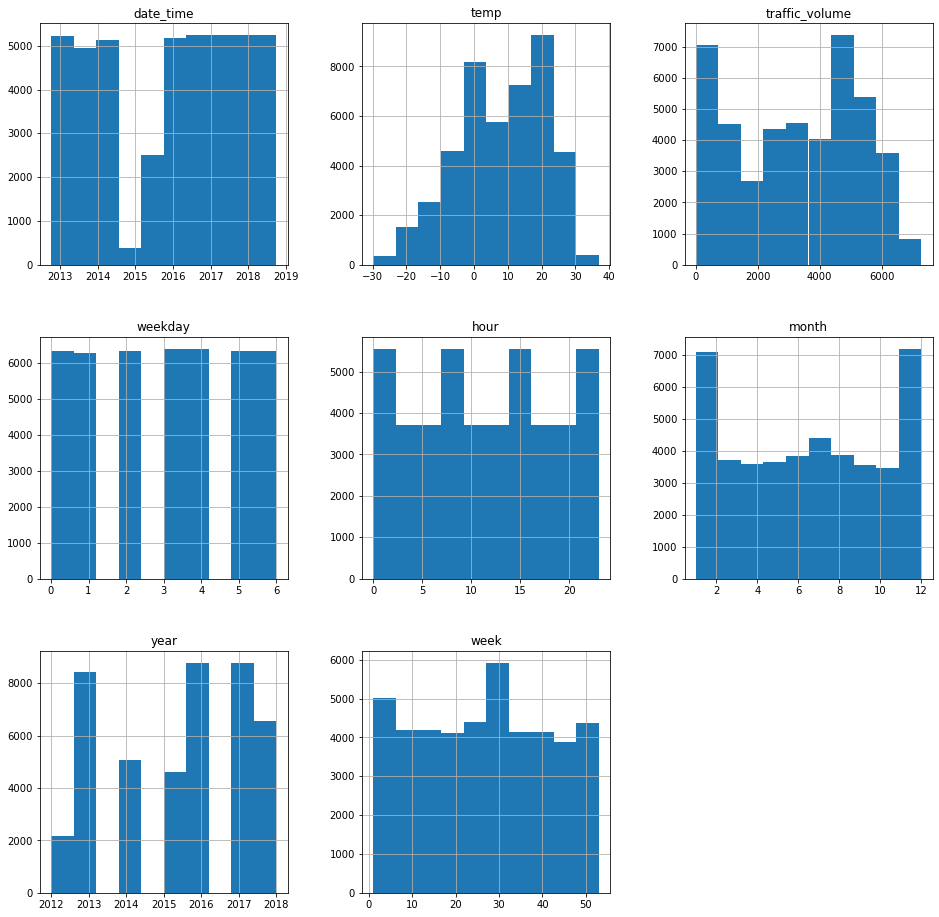

In [30]:
df_interpolated.hist(figsize=(16,16))
plt.show()

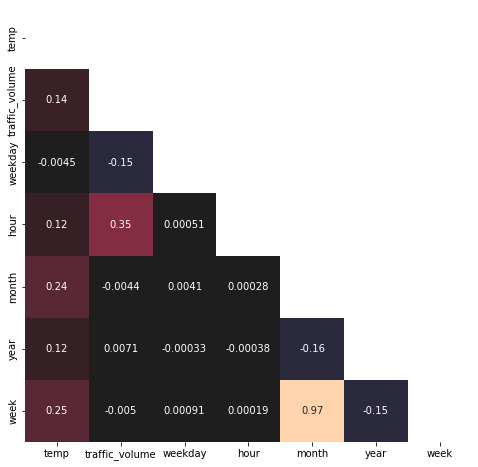

In [31]:
plt.figure(figsize=(8,8))

corr_matrix = df_interpolated.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

sns.heatmap(lower, annot=True, cbar=False, center=0);

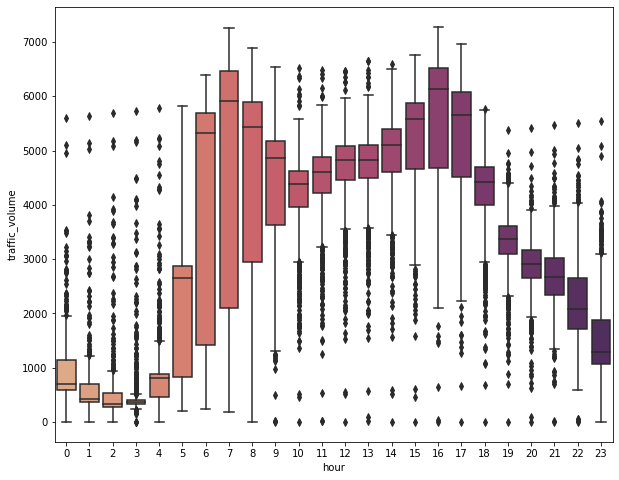

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(y='traffic_volume',x='hour', data=df_interpolated, palette='flare')
plt.show()

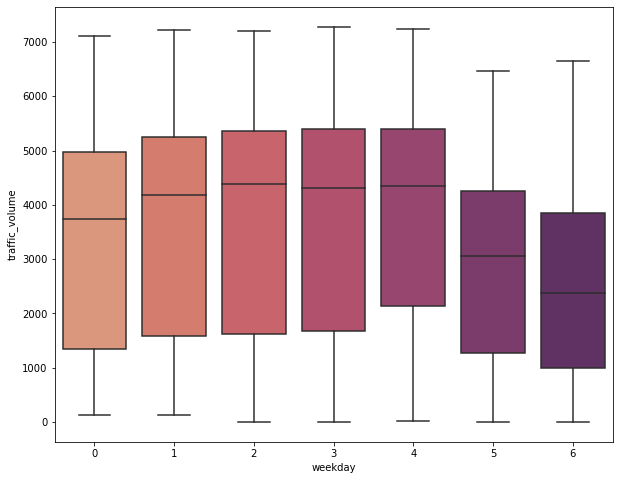

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(y='traffic_volume',x='weekday', data=df_interpolated, palette='flare')
plt.show()

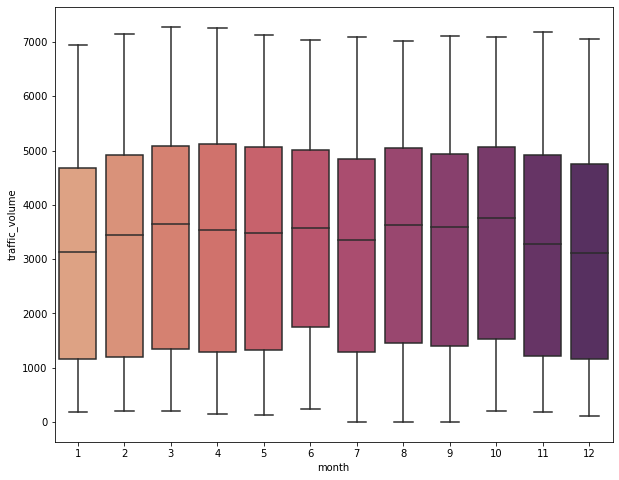

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(y='traffic_volume',x='month', data=df_interpolated, palette='flare')
plt.show()

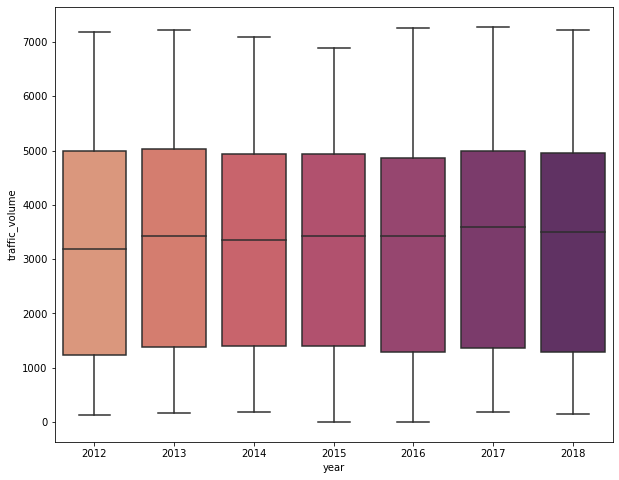

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(y='traffic_volume',x='year', data=df_interpolated, palette='flare')
plt.show()

Ищем день, предшествующий 14 днями последнему дню датасета:

In [36]:
df_interpolated.iloc[-1:]['date_time'] + timedelta(-14)

44394   2018-09-16 23:00:00
Name: date_time, dtype: datetime64[ns]

Тестовый набор данных будет - 14 дней после 16.09.22, тренировоночный набор - 30 дней перед тестовым, т.е. с 17.08.2018:

In [67]:
border_date = '2018-09-16 00:00:00'
start_date = datetime.strptime('2018-09-16 00:00:00', '%Y-%m-%d %H:%M:%S') + timedelta(-60)

In [68]:
df_train = df_interpolated.loc[(df_interpolated['date_time'] >= start_date.strftime('%Y-%m-%d %H:%M:%S')) & (df_interpolated['date_time'] < border_date)].copy()
df_test = df_interpolated.loc[df_interpolated['date_time'] >= border_date].copy()

In [69]:
df_train

,date_time,holiday,temp,traffic_volume,weekday,hour,month,year,week
42595,2018-07-18 00:00:00,None,18.34,657.0,2,0,7,2018,29
42596,2018-07-18 01:00:00,None,17.21,410.0,2,1,7,2018,29
42597,2018-07-18 02:00:00,None,16.14,313.0,2,2,7,2018,29
42598,2018-07-18 03:00:00,None,16.40,377.0,2,3,7,2018,29
42599,2018-07-18 04:00:00,None,15.74,894.0,2,4,7,2018,29
...,...,...,...,...,...,...,...,...,...
44030,2018-09-15 19:00:00,None,31.32,3455.0,5,19,9,2018,37
44031,2018-09-15 20:00:00,None,28.19,3208.0,5,20,9,2018,37
44032,2018-09-15 21:00:00,None,26.11,3055.0,5,21,9,2018,37
44033,2018-09-15 22:00:00,None,25.06,2741.0,5,22,9,2018,37


In [70]:
df_test

,date_time,holiday,temp,traffic_volume,weekday,hour,month,year,week
44035,2018-09-16 00:00:00,None,24.42,1353.0,6,0,9,2018,37
44036,2018-09-16 01:00:00,None,23.96,786.0,6,1,9,2018,37
44037,2018-09-16 02:00:00,None,23.62,607.0,6,2,9,2018,37
44038,2018-09-16 03:00:00,None,23.27,401.0,6,3,9,2018,37
44039,2018-09-16 04:00:00,None,22.68,313.0,6,4,9,2018,37
...,...,...,...,...,...,...,...,...,...
44390,2018-09-30 19:00:00,None,10.30,3543.0,6,19,9,2018,39
44391,2018-09-30 20:00:00,None,9.61,2781.0,6,20,9,2018,39
44392,2018-09-30 21:00:00,None,9.58,2159.0,6,21,9,2018,39
44393,2018-09-30 22:00:00,None,8.94,1450.0,6,22,9,2018,39


In [84]:
pd.plotting.register_matplotlib_converters()

In [93]:
df_train.index = df_train['date_time']
df_test.index = df_test['date_time']

In [94]:
df_train.index = pd.DatetimeIndex(df_train.index).to_period('M')

ConversionError: Failed to convert value(s) to axis units: array([Period('2018-07', 'M'), Period('2018-07', 'M'),
       Period('2018-07', 'M'), ..., Period('2018-09', 'M'),
       Period('2018-09', 'M'), Period('2018-09', 'M')], dtype=object)

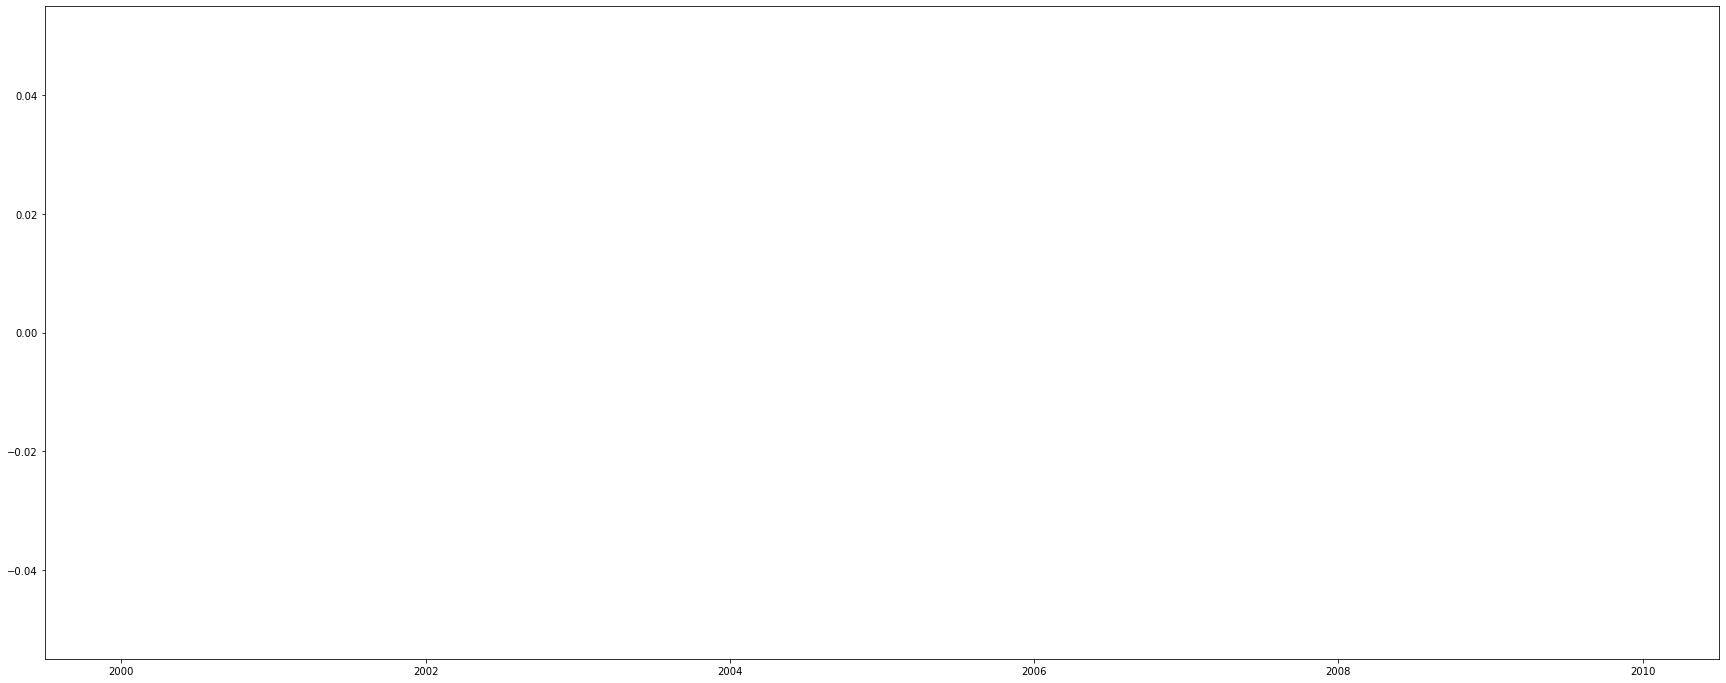

In [95]:
model = sm.tsa.arima.ARIMA(df_train.traffic_volume, order=(2, 0, 1))  
results_ARIMA = model.fit()

plt.figure(figsize=(30,12))
plt.plot()
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()

fig = plt.figure(figsize=(30, 12))
ax = fig.add_subplot()
ax.plot(df_train.traffic_volume)
ax.xaxis.set_major_locator(md.MonthLocator(interval = 1))
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
# ax.set_xticklabels([])
# ax.set_yticklabels([])